## Ridge (L2) Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings

filterwarnings('ignore')

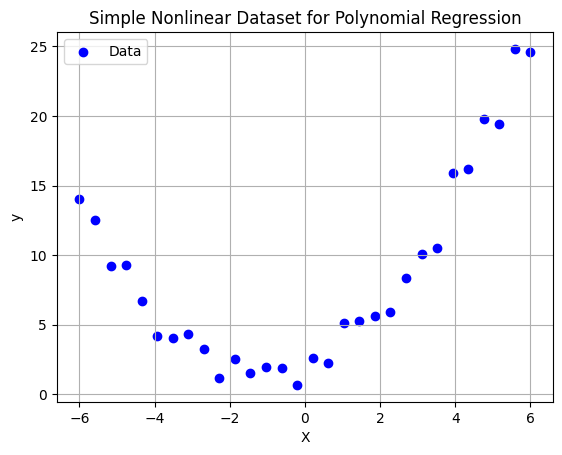

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic nonlinear data (quadratic pattern + noise)
np.random.seed(4)
X = np.linspace(-6, 6, 30)
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1, len(X))  # y = 0.5x² + x + 2 + noise

# Visualize
plt.scatter(X, y, color='blue', label='Data')
plt.title("Simple Nonlinear Dataset for Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

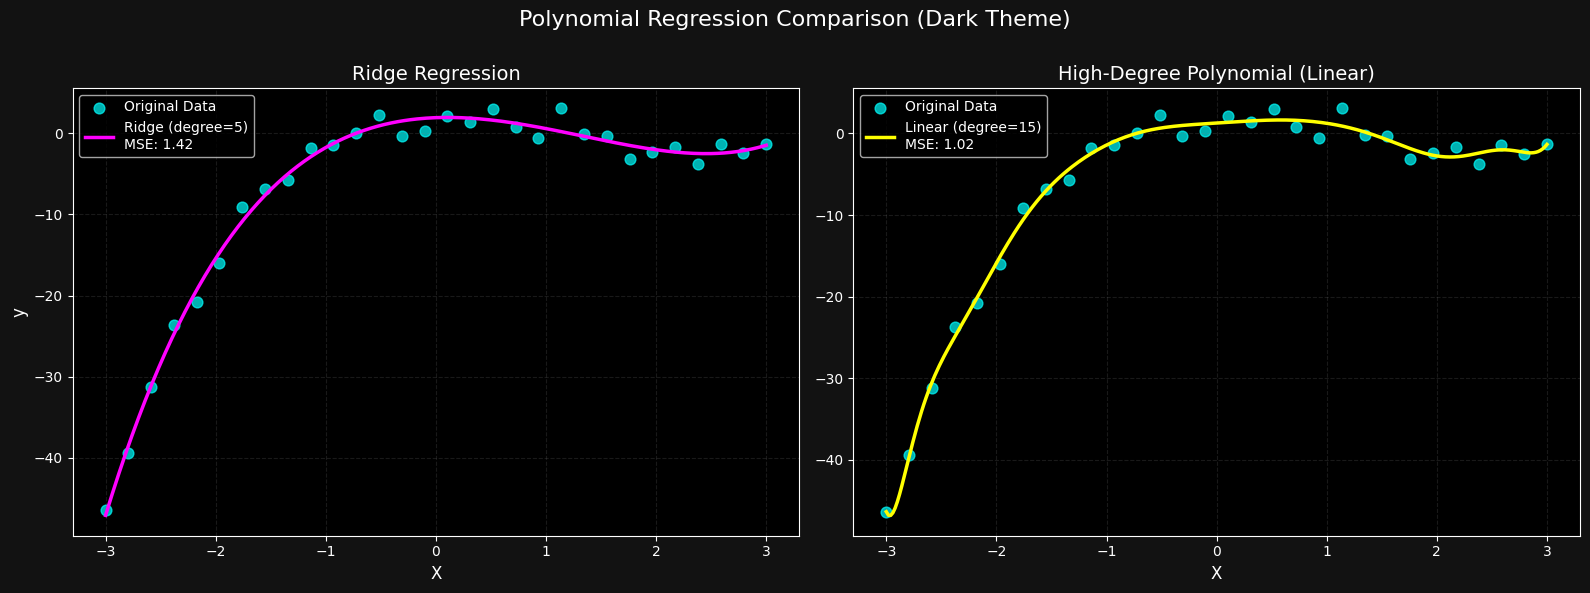

In [35]:
# Set dark theme
plt.style.use('dark_background')

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 30)
y = 0.8 * X**3 - 3 * X**2 + 0.5 * X + 3 + np.random.normal(0, 1.5, len(X))
X_reshaped = X.reshape(-1, 1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='#121212')
fig.suptitle('Polynomial Regression Comparison (Dark Theme)', fontsize=16, color='white')

# First plot: Ridge Regression
degree = 5
model_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', Ridge(alpha=0.1))
])
model_ridge.fit(X_reshaped, y)
ms_ridge = mean_squared_error(y, model_ridge.predict(X_reshaped))

# Smooth curve for Ridge
X_smooth = np.linspace(-3, 3, 300).reshape(-1, 1)
y_smooth_ridge = model_ridge.predict(X_smooth)

ax1.scatter(X, y, color='cyan', label='Original Data', marker='o', s=60, alpha=0.7)
ax1.plot(X_smooth, y_smooth_ridge, 'magenta', linewidth=2.5, 
        label=f'Ridge (degree={degree})\nMSE: {mse_ridge:.2f}')
ax1.set_title("Ridge Regression", fontsize=14)
ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("y", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.2, color='gray')
ax1.legend(fontsize=10)

# Second plot: Linear Regression (High Degree)
degree = 15
model_lin = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
model_lin.fit(X_reshaped, y)
mse_lin = mean_squared_error(y, model_lin.predict(X_reshaped))

# Smooth curve for Linear
y_smooth_lin = model_lin.predict(X_smooth)

ax2.scatter(X, y, color='cyan', label='Original Data', marker='o', s=60, alpha=0.7)
ax2.plot(X_smooth, y_smooth_lin, 'yellow', linewidth=2.5, 
        label=f'Linear (degree={degree})\nMSE: {mse_lin:.2f}')
ax2.set_title("High-Degree Polynomial (Linear)", fontsize=14)
ax2.set_xlabel("X", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.2, color='gray')
ax2.legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()